In [1]:
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import json

# scraping
from bs4 import BeautifulSoup
import urllib.request

# scale figures
scale_factor = 2
default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = default_dpi*8

In [2]:
data_path = 'data/city council/geo_export_5501c68d-4369-4413-aef5-ade7b85945a2.shp'
shapes = gp.GeoDataFrame.from_file(data_path)

print(shapes.head())

  ward    shape_area    shape_leng  \
0   12  1.160965e+08  93073.340838   
1   16  1.031436e+08  97901.323833   
2   15  6.558830e+07  82183.694820   
3   20  1.372904e+08  90105.195619   
4   49  4.973346e+07  38122.692826   

                                            geometry  
0  POLYGON ((-87.69623470134458 41.85755495238389...  
1  POLYGON ((-87.66288923669032 41.79883809868242...  
2  POLYGON ((-87.69817510963803 41.81729440755995...  
3  POLYGON ((-87.65524133440029 41.80883316182794...  
4  POLYGON ((-87.66420403810295 42.02126158052747...  


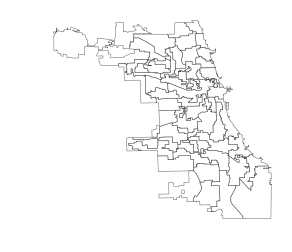

In [3]:
plt.figure()
ax = plt.gca()

for idx in range(shapes.shape[0]):
    
    district_id = shapes.loc[idx,'ward']
    try:
        plot_color = 'white'
        shapes.loc[[idx],'geometry'].plot(ax=ax, alpha=0.6, linewidth=0.5, edgecolor='black',facecolor=plot_color)
        
    except Exception as e: # no data
        print('warning...')
        print(e)
        
        plot_color='gray' 
        shapes.loc[[idx],'geometry'].plot(ax=ax, alpha=0.6, linewidth=0.5, edgecolor='black',facecolor=plot_color)

plt.axis('scaled')
plt.axis('off')
plt.savefig("data/chicago_wards.svg")
plt.show()